In [17]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import levene

Definition of confounding variable: (1) they affect the dependent variable and (2) the groups differ on the confounding variable.$\newline$
We will test wether or not the potential confound has an impact on the dependent variable alone. If yes, it is possible that it caused the resulting difference. If no, it is not a confound.$\newline$
Then, we will test if there is still a difference in the groups when the confound is applied.

In [3]:
'''
Columns are:
1. Average Rating (the arithmetic mean of all individual quality ratings of this professor)
2. Average Difficulty (the arithmetic mean of all individual difficulty ratings of this professor)
3. Number of ratings (simply the total number of ratings these averages are based on)
4. Received a “pepper”? (Boolean - was this professor judged as “hot” by the students?)
5. The proportion of students that said they would take the class again
6. The number of ratings coming from online classes
7. Male gender (Boolean – 1: determined with high confidence that professor is male)
8. Female (Boolean – 1: determined with high confidence that professor is female)
'''
numDat = pd.read_csv('rmpCapstoneNum.csv', header=None)
numDat.columns = ['Average Rating', 'Average Difficulty', 'Number of ratings', 'Received a pepper', 
                       'Proportion of students that said they would take the class again', 
                       'Number of ratings coming from online classes', 'Male Professor', 'Female Professor']

2.) Is there a gender difference in the spread (variance/dispersion) of the ratings distribution?

First, we only consider professors with at least 10 ratings, and we only consider those with high confidence gender

In [5]:
# Keep rows where 'Number of ratings' is greater or equal to 10
numDat = numDat.loc[numDat['Number of ratings'] >= 10]

# Remove rows where 'Male Professor' and 'Female Professor' are both 0 or both 1
numDat = numDat.loc[
    ~((numDat['Male Professor'] == 0) & (numDat['Female Professor'] == 0)) &
    ~((numDat['Male Professor'] == 1) & (numDat['Female Professor'] == 1))
]

# Display the final filtered dataset
numDat

,Average Rating,Average Difficulty,Number of ratings,Received a pepper,Proportion of students that said they would take the class again,Number of ratings coming from online classes,Male Professor,Female Professor
5,3.5,3.3,22.0,0.0,56.0,7.0,1,0
21,2.6,4.1,10.0,0.0,NaN,0.0,1,0
25,4.3,3.3,16.0,1.0,83.0,0.0,0,1
39,3.5,3.2,20.0,1.0,NaN,0.0,1,0
40,1.8,3.8,15.0,0.0,22.0,1.0,0,1
...,...,...,...,...,...,...,...,...
89810,3.4,3.4,14.0,0.0,54.0,5.0,1,0
89841,4.2,3.8,11.0,0.0,NaN,0.0,0,1
89855,4.0,1.9,11.0,1.0,60.0,0.0,1,0
89866,4.4,3.6,14.0,1.0,88.0,0.0,0,1


We first visualize the variation in the distributions among men and women

In [8]:
# Create DataFrames for Male and Female Professors
numDat_male = numDat[numDat['Male Professor'] == 1]
numDat_female = numDat[numDat['Female Professor'] == 1]

In [21]:
numDat_male.describe()

,Average Rating,Average Difficulty,Number of ratings,Received a pepper,Proportion of students that said they would take the class again,Number of ratings coming from online classes,Male Professor,Female Professor
count,3987.000000,3987.000000,3987.000000,3987.000000,3357.000000,3987.000000,3987.0,3987.0
mean,3.964184,2.940030,18.892902,0.482318,78.855824,0.653373,1.0,0.0
std,0.857271,0.769503,16.879471,0.499750,23.712334,1.938917,0.0,0.0
min,1.000000,1.000000,10.000000,0.000000,4.000000,0.000000,1.0,0.0
25%,3.500000,2.400000,11.000000,0.000000,67.000000,0.000000,1.0,0.0
50%,4.300000,2.900000,14.000000,0.000000,86.000000,0.000000,1.0,0.0
75%,4.600000,3.500000,20.000000,1.000000,100.000000,0.000000,1.0,0.0
max,5.000000,5.000000,393.000000,1.000000,100.000000,19.000000,1.0,0.0


In [22]:
numDat_female.describe()

,Average Rating,Average Difficulty,Number of ratings,Received a pepper,Proportion of students that said they would take the class again,Number of ratings coming from online classes,Male Professor,Female Professor
count,3118.000000,3118.000000,3118.000000,3118.000000,2606.000000,3118.000000,3118.0,3118.0
mean,3.888775,2.946985,17.611931,0.509942,76.599770,0.878768,0.0,1.0
std,0.898383,0.765935,13.335368,0.499981,24.699061,2.260269,0.0,0.0
min,1.000000,1.000000,10.000000,0.000000,5.000000,0.000000,0.0,1.0
25%,3.400000,2.400000,11.000000,0.000000,63.000000,0.000000,0.0,1.0
50%,4.200000,2.900000,14.000000,1.000000,83.000000,0.000000,0.0,1.0
75%,4.600000,3.500000,19.000000,1.000000,100.000000,1.000000,0.0,1.0
max,5.000000,5.000000,247.000000,1.000000,100.000000,19.000000,0.0,1.0


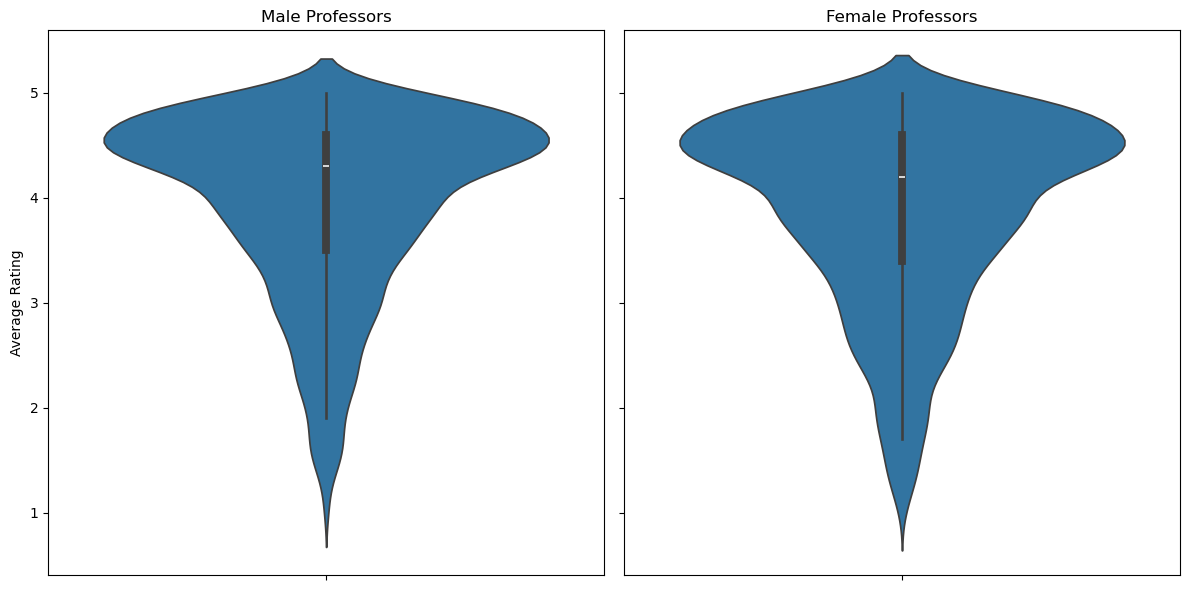

In [11]:
# Create subplots for violin plots
fig, axes = plt.subplots(1, 2, figsize=(12, 6), sharey=True)

# Violin plot for Male Professors
sns.violinplot(ax=axes[0], y=numDat_male['Average Rating'])
axes[0].set_title('Male Professors')
axes[0].set_ylabel('Average Rating')

# Violin plot for Female Professors
sns.violinplot(ax=axes[1], y=numDat_female['Average Rating'])
axes[1].set_title('Female Professors')

# Overall adjustments
plt.tight_layout()
plt.show()

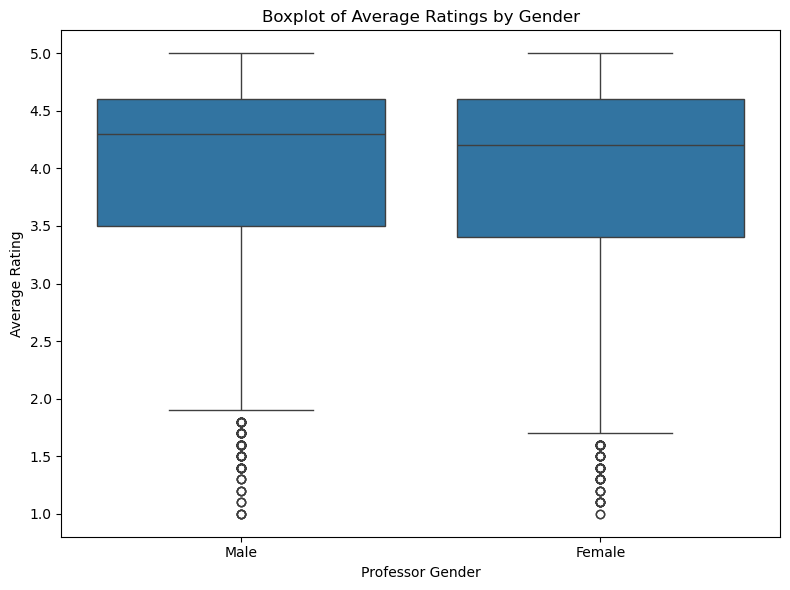

In [16]:
# Filter data for Male and Female Professors
numDat_male = numDat[numDat['Male Professor'] == 1].copy()
numDat_female = numDat[numDat['Female Professor'] == 1].copy()

# Add Gender column
numDat_male['Gender'] = 'Male'
numDat_female['Gender'] = 'Female'

# Concatenate both dataframes
boxplot_data = pd.concat([numDat_male, numDat_female])

# Create the boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(x='Gender', y='Average Rating', data=boxplot_data)

# Add title and labels
plt.title('Boxplot of Average Ratings by Gender')
plt.xlabel('Professor Gender')
plt.ylabel('Average Rating')

# Show the plot
plt.tight_layout()
plt.show()

Lets test the difference in variance before we consider confounds

In [19]:
# Filter data for Male and Female Professors
numDat_male = numDat[numDat['Male Professor'] == 1]
numDat_female = numDat[numDat['Female Professor'] == 1]

# Extract Average Ratings for Male and Female Professors
ratings_male = numDat_male['Average Rating']
ratings_female = numDat_female['Average Rating']

# Perform Levene's Test
stat, p_value = levene(ratings_male, ratings_female)

# Display the results
print(f"Levene's Test Statistic: {stat:.4f}")
print(f"P-value: {p_value:.4f}")

# Interpretation
if p_value < 0.005:  # Using significance level of 0.005
    print("The variances are significantly different (reject the null hypothesis).")
else:
    print("The variances are not significantly different (fail to reject the null hypothesis).")

Levene's Test Statistic: 9.2405
P-value: 0.0024
The variances are significantly different (reject the null hypothesis).


Here we see that the variance in the distributions of average rating among men and women is significantly different.$\newline$
This does not necessarily imply that the gender is the CAUSE of this difference.$\newline$
To confirm this is actually gender bias, we will test the impact of the potential confounds.

What are potential confounds in our data? Number of ratings, Average Difficulty, Proportion that said they would take professor again, the number of ratings from online courses, and finally if the professor received a pepper.

#### Number of Rating as a confound

Does number of ratings impact the distributions of average rating of professors?

The null hypothesis: All 4 groups have equal variances.$\newline$
The alternative hypothesis: At least one group has a variance that is significantly different from the others.$\newline$
If the p-value is less than the significance level (e.g., 0.005), you reject the null hypothesis and conclude that there are significant differences in variances across the groups.

Levene's Test Statistic: 3.7179, P-value: 0.0110
The variances are not significantly different (fail to reject the null hypothesis).


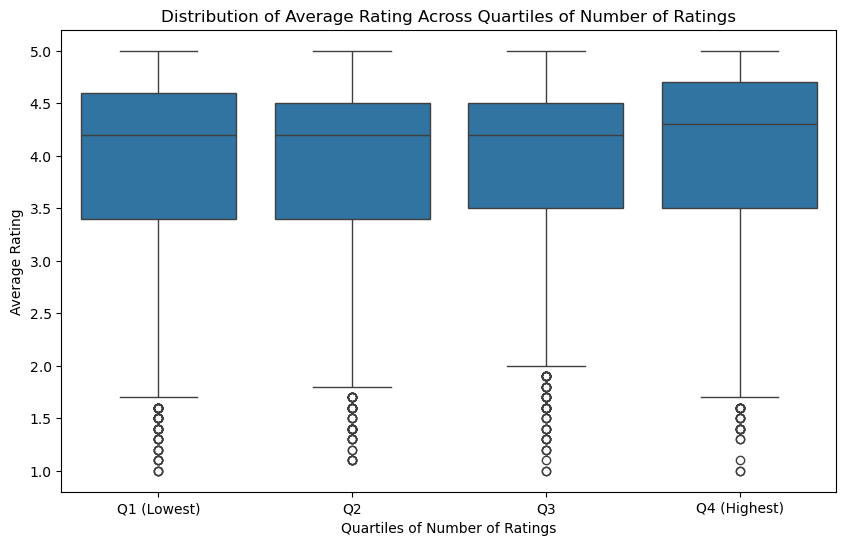

In [104]:
# Step 1: Create Quartiles for Number of Ratings
numDat['Ratings Quartile'] = pd.qcut(
    numDat['Number of ratings'], 
    q=4,  # Divide into 4 quartiles
    labels=['Q1 (Lowest)', 'Q2', 'Q3', 'Q4 (Highest)']
)

# Step 2: Extract Distributions of Average Rating for Each Quartile
quartile_distributions = [
    numDat[numDat['Ratings Quartile'] == quartile]['Average Rating']
    for quartile in numDat['Ratings Quartile'].unique()
]

# Step 3: Perform Levene's Test to Compare Variances of Average Rating Across Quartiles
stat, p_value = levene(*quartile_distributions)  # Unpack the list of distributions
print(f"Levene's Test Statistic: {stat:.4f}, P-value: {p_value:.4f}")

# Interpretation
if p_value < 0.005:
    print("The variances are significantly different (reject the null hypothesis).")
else:
    print("The variances are not significantly different (fail to reject the null hypothesis).")

# Step 4: Visualize the Distributions Using Boxplots
plt.figure(figsize=(10, 6))
sns.boxplot(x='Ratings Quartile', y='Average Rating', data=numDat)
plt.title('Distribution of Average Rating Across Quartiles of Number of Ratings')
plt.xlabel('Quartiles of Number of Ratings')
plt.ylabel('Average Rating')
plt.show()

The Number of Ratings does not lead to a difference in the variance of the distributions of Average Rating.$\newline$
Number of Ratings is NOT a confound.

#### Proportion that said they would take again as a confound

Does the Proportion of students that said they would take the class again impact the distributions of average rating of professors?

The null hypothesis: All 4 groups have equal variances.$\newline$
The alternative hypothesis: At least one group has a variance that is significantly different from the others.$\newline$
If the p-value is less than the significance level (e.g., 0.005), you reject the null hypothesis and conclude that there are significant differences in variances across the groups.

In [105]:
numDat['Proportion of students that said they would take the class again'].describe()

count    5963.000000
mean       77.869864
std        24.172397
min         4.000000
25%        64.000000
50%        86.000000
75%       100.000000
max       100.000000
Name: Proportion of students that said they would take the class again, dtype: float64

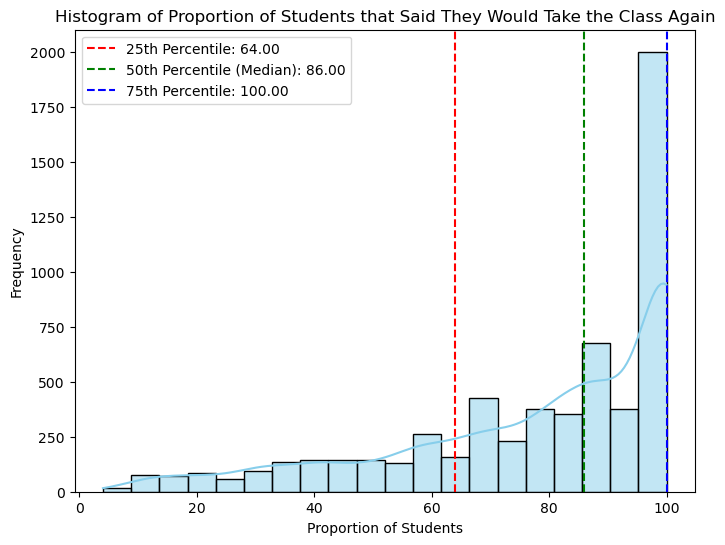

In [65]:
# Calculate descriptive statistics
percentiles = numDat['Proportion of students that said they would take the class again'].quantile([0.25, 0.5, 0.75])
p25, p50, p75 = percentiles[0.25], percentiles[0.5], percentiles[0.75]

# Plot histogram
plt.figure(figsize=(8, 6))
sns.histplot(data=numDat, x='Proportion of students that said they would take the class again', kde=True, bins=20, color='skyblue')

# Add percentile markers
plt.axvline(p25, color='red', linestyle='--', label=f'25th Percentile: {p25:.2f}')
plt.axvline(p50, color='green', linestyle='--', label=f'50th Percentile (Median): {p50:.2f}')
plt.axvline(p75, color='blue', linestyle='--', label=f'75th Percentile: {p75:.2f}')

# Add title and labels
plt.title('Histogram of Proportion of Students that Said They Would Take the Class Again')
plt.xlabel('Proportion of Students')
plt.ylabel('Frequency')
plt.legend()  # Add legend for markers
plt.show()

Proportion Groups
87-100    2860
65-86     1594
4-64      1508
Name: count, dtype: int64
Levene's Test Statistic: 516.8484, P-value: 0.0000
The variances are significantly different (reject the null hypothesis).


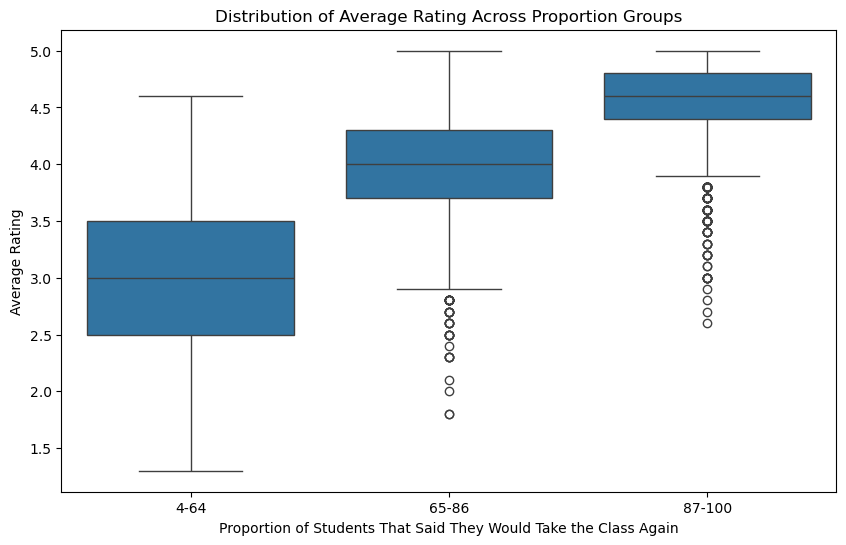

In [109]:
# Step 1: Drop NaN rows for the proportion column
numDat = numDat.dropna(subset=['Proportion of students that said they would take the class again'])

# Step 2: Create Groups for Proportion of Students
numDat['Proportion Groups'] = pd.cut(
    numDat['Proportion of students that said they would take the class again'],
    bins=[4, 64, 86, 100],  # Define bins for the 3 groups
    labels=['4-64', '65-86', '87-100']
)

# Step 3: Check group sizes to ensure no empty groups
print(numDat['Proportion Groups'].value_counts())

# Step 4: Extract Distributions of Average Rating for Each Group
proportion_distributions = [
    numDat[numDat['Proportion Groups'] == group]['Average Rating']
    for group in numDat['Proportion Groups'].unique()
]

# Step 5: Handle empty groups (ensure all groups have data)
proportion_distributions = [dist for dist in proportion_distributions if len(dist) > 0]

# Step 6: Perform Levene's Test to Compare Variances
if len(proportion_distributions) > 1:  # Ensure at least 2 groups remain
    stat, p_value = levene(*proportion_distributions)  # Unpack the list of distributions
    print(f"Levene's Test Statistic: {stat:.4f}, P-value: {p_value:.4f}")

    # Interpretation
    if p_value < 0.005:
        print("The variances are significantly different (reject the null hypothesis).")
    else:
        print("The variances are not significantly different (fail to reject the null hypothesis).")
else:
    print("Not enough groups with data to perform Levene's test.")

# Step 7: Visualize the Distributions Using Boxplots
plt.figure(figsize=(10, 6))
sns.boxplot(x='Proportion Groups', y='Average Rating', data=numDat)
plt.title('Distribution of Average Rating Across Proportion Groups')
plt.xlabel('Proportion of Students That Said They Would Take the Class Again')
plt.ylabel('Average Rating')
plt.show()


From above, we see that 'Proportion of students that said they would take the class again' impacts the variance of distribution of Average Rating. $\newline$ Hence, it is a confound.

We will control for the confound and see if there is still a significant difference among Male and Female professors.

Testing group: 4-64
Levene's Test Statistic: 0.1158, P-value: 0.7337
The variances are not significantly different (fail to reject the null hypothesis).
--------------------------------------------------
Testing group: 65-86
Levene's Test Statistic: 1.5050, P-value: 0.2201
The variances are not significantly different (fail to reject the null hypothesis).
--------------------------------------------------
Testing group: 87-100
Levene's Test Statistic: 0.0725, P-value: 0.7877
The variances are not significantly different (fail to reject the null hypothesis).
--------------------------------------------------
Testing group: nan
Not enough data for Levene's test in this group.
--------------------------------------------------


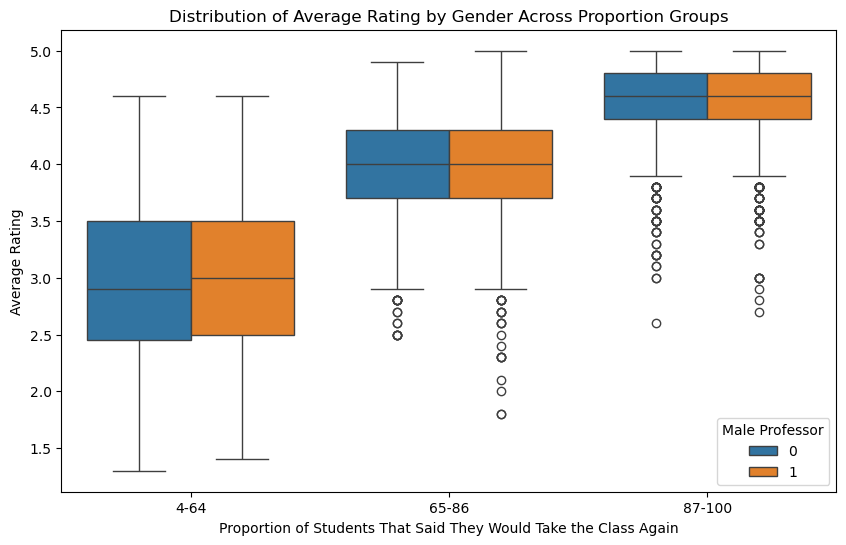

In [110]:
# Step 1: Drop NaN rows for the proportion column
numDat = numDat.dropna(subset=['Proportion of students that said they would take the class again'])

# Step 2: Create Groups for Proportion of Students
numDat['Proportion Groups'] = pd.cut(
    numDat['Proportion of students that said they would take the class again'],
    bins=[4, 64, 86, 100],  # Define bins for the 3 groups
    labels=['4-64', '65-86', '87-100']
)

# Step 3: Iterate Through Each Group and Test Variance for Men vs. Women
for group in numDat['Proportion Groups'].unique():
    print(f"Testing group: {group}")
    
    # Filter data for the current group
    group_data = numDat[numDat['Proportion Groups'] == group]
    
    # Extract Average Rating for Male and Female Professors
    ratings_male = group_data[group_data['Male Professor'] == 1]['Average Rating']
    ratings_female = group_data[group_data['Female Professor'] == 1]['Average Rating']
    
    # Perform Levene's Test if there is enough data
    if len(ratings_male) > 1 and len(ratings_female) > 1:  # Ensure sufficient data for test
        stat, p_value = levene(ratings_male, ratings_female)
        print(f"Levene's Test Statistic: {stat:.4f}, P-value: {p_value:.4f}")
        
        # Interpretation
        if p_value < 0.005:
            print("The variances are significantly different (reject the null hypothesis).")
        else:
            print("The variances are not significantly different (fail to reject the null hypothesis).")
    else:
        print("Not enough data for Levene's test in this group.")
    
    print("-" * 50)

# Optional: Visualize Variance for Each Group
plt.figure(figsize=(10, 6))
sns.boxplot(x='Proportion Groups', y='Average Rating', hue='Male Professor', data=numDat)
plt.title('Distribution of Average Rating by Gender Across Proportion Groups')
plt.xlabel('Proportion of Students That Said They Would Take the Class Again')
plt.ylabel('Average Rating')
plt.legend(title='Male Professor')
plt.show()

When male and female professors were given the same proportions of students, the variance differences in their average ratings disappeared, indicating that the proportion of students is a confounding factor influencing the variability in ratings.

#### Number of ratings coming from online classes as a confound

Does number of ratings coming from online classes impact the distributions of average rating of professors?

In [70]:
print(numDat['Number of ratings coming from online classes'].describe())

count    7105.000000
mean        0.752287
std         2.088890
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max        19.000000
Name: Number of ratings coming from online classes, dtype: float64


In [111]:
# Step 1: Split data into two groups
online_ratings_0 = numDat[numDat['Number of ratings coming from online classes'] == 0]
online_ratings_1plus = numDat[numDat['Number of ratings coming from online classes'] >= 1]

# Step 2: Extract Average Ratings for Each Group
ratings_0 = online_ratings_0['Average Rating']
ratings_1plus = online_ratings_1plus['Average Rating']

# Step 3: Perform Levene's Test
if len(ratings_0) > 1 and len(ratings_1plus) > 1:  # Ensure sufficient data for the test
    stat, p_value = levene(ratings_0, ratings_1plus)
    print(f"Levene's Test Statistic: {stat:.4f}, P-value: {p_value:.4f}")
    
    # Interpretation
    if p_value < 0.005:
        print("The variances are significantly different (reject the null hypothesis).")
    else:
        print("The variances are not significantly different (fail to reject the null hypothesis).")
else:
    print("Not enough data for one or both groups to perform Levene's test.")

Levene's Test Statistic: 2.1937, P-value: 0.1386
The variances are not significantly different (fail to reject the null hypothesis).


Here we see that when we consider Online classes there is no difference in the variation of the distributions of average ratings.$\newline$ We conclude that Number of ratings coming from online classes is not a likely confound.

Does average difficulty impact the distributions of average rating of professors?

In [112]:
numDat['Average Difficulty'].describe()

count    5963.000000
mean        2.931092
std         0.740288
min         1.000000
25%         2.400000
50%         2.900000
75%         3.500000
max         5.000000
Name: Average Difficulty, dtype: float64

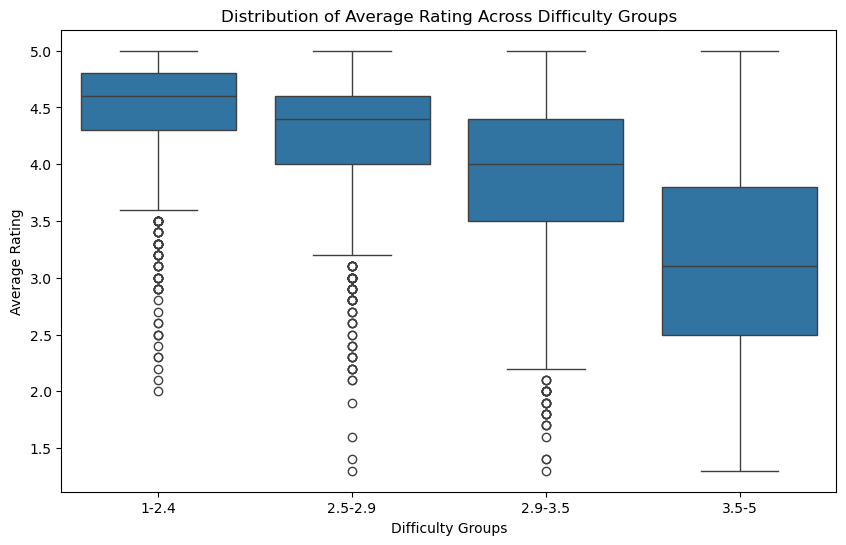

In [114]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Difficulty Groups', y='Average Rating', data=numDat)
plt.title('Distribution of Average Rating Across Difficulty Groups')
plt.xlabel('Difficulty Groups')
plt.ylabel('Average Rating')
plt.show()

In [116]:
from itertools import combinations

# Step 1: Define groups for Average Difficulty
numDat['Difficulty Groups'] = pd.cut(
    numDat['Average Difficulty'],
    bins=[1, 2.4, 2.9, 3.5, 5],  # Define ranges for the 4 groups
    labels=['1-2.4', '2.5-2.9', '2.9-3.5', '3.5-5']
)

# Step 2: Get all group names and pairwise combinations
groups = numDat['Difficulty Groups'].unique()
pairs = list(combinations(groups, 2))  # All pairwise combinations of groups

# Step 3: Perform Levene's Test for each pair of groups
print("Pairwise Levene's Test Results:")
for pair in pairs:
    group1_data = numDat[numDat['Difficulty Groups'] == pair[0]]['Average Rating']
    group2_data = numDat[numDat['Difficulty Groups'] == pair[1]]['Average Rating']
    
    # Ensure both groups have enough data points
    if len(group1_data) > 1 and len(group2_data) > 1:
        stat, p_value = levene(group1_data, group2_data)
        print(f"Comparing {pair[0]} vs {pair[1]}: Levene's Test Statistic = {stat:.4f}, P-value = {p_value:.4f}")
        
        # Interpretation
        if p_value < 0.005:
            print("  The variances are significantly different (reject the null hypothesis).")
        else:
            print("  The variances are not significantly different (fail to reject the null hypothesis).")
    else:
        print(f"Not enough data to compare {pair[0]} vs {pair[1]}.")
    print("-" * 50)


Pairwise Levene's Test Results:
Comparing 2.9-3.5 vs 3.5-5: Levene's Test Statistic = 101.3738, P-value = 0.0000
  The variances are significantly different (reject the null hypothesis).
--------------------------------------------------
Comparing 2.9-3.5 vs 1-2.4: Levene's Test Statistic = 296.6148, P-value = 0.0000
  The variances are significantly different (reject the null hypothesis).
--------------------------------------------------
Comparing 2.9-3.5 vs 2.5-2.9: Levene's Test Statistic = 108.2662, P-value = 0.0000
  The variances are significantly different (reject the null hypothesis).
--------------------------------------------------
Not enough data to compare 2.9-3.5 vs nan.
--------------------------------------------------
Comparing 3.5-5 vs 1-2.4: Levene's Test Statistic = 689.6750, P-value = 0.0000
  The variances are significantly different (reject the null hypothesis).
--------------------------------------------------
Comparing 3.5-5 vs 2.5-2.9: Levene's Test Statisti

The Average Difficulty alone has a huge impact on the variance in the distribution of average ratings of the professors.$\newline$ So it is a confound.

We will now control for the confound and see if there is still a significant difference in variance of distributions.

In [117]:
from scipy.stats import levene, ttest_ind
import pandas as pd

# Step 1: Define groups for Average Difficulty
numDat['Difficulty Groups'] = pd.cut(
    numDat['Average Difficulty'],
    bins=[1, 2.4, 2.9, 3.5, 5],  # Define ranges for the 4 groups
    labels=['1-2.4', '2.5-2.9', '2.9-3.5', '3.5-5']
)

# Step 2: Test for gender differences within each group
print("Testing gender differences within each difficulty group:")
for group in numDat['Difficulty Groups'].unique():
    print(f"Difficulty Group: {group}")
    
    # Filter data for the current group
    group_data = numDat[numDat['Difficulty Groups'] == group]
    
    # Extract Average Rating for Male and Female Professors
    ratings_male = group_data[group_data['Male Professor'] == 1]['Average Rating']
    ratings_female = group_data[group_data['Female Professor'] == 1]['Average Rating']
    
    # Perform Levene's Test for variance comparison
    if len(ratings_male) > 1 and len(ratings_female) > 1:
        stat_var, p_var = levene(ratings_male, ratings_female)
        print(f"  Levene's Test - Variance P-value: {p_var:.4f}")
        
        # If variances are not significantly different, perform a T-Test
        if p_var >= 0.005:
            stat_mean, p_mean = ttest_ind(ratings_male, ratings_female, equal_var=True)
            print(f"  T-Test - Mean P-value: {p_mean:.4f}")
            
            if p_mean < 0.005:
                print("  The means are significantly different (reject the null hypothesis).")
            else:
                print("  The means are not significantly different (fail to reject the null hypothesis).")
        else:
            print("  Variances are significantly different, skipping T-Test.")
    else:
        print("  Not enough data for this group.")
    
    print("-" * 50)


Testing gender differences within each difficulty group:
Difficulty Group: 2.9-3.5
  Levene's Test - Variance P-value: 0.0035
  Variances are significantly different, skipping T-Test.
--------------------------------------------------
Difficulty Group: 3.5-5
  Levene's Test - Variance P-value: 0.5406
  T-Test - Mean P-value: 0.0198
  The means are not significantly different (fail to reject the null hypothesis).
--------------------------------------------------
Difficulty Group: 1-2.4
  Levene's Test - Variance P-value: 0.8453
  T-Test - Mean P-value: 0.7275
  The means are not significantly different (fail to reject the null hypothesis).
--------------------------------------------------
Difficulty Group: 2.5-2.9
  Levene's Test - Variance P-value: 0.1543
  T-Test - Mean P-value: 0.2419
  The means are not significantly different (fail to reject the null hypothesis).
--------------------------------------------------
Difficulty Group: nan
  Not enough data for this group.
-----------

Conclusion:

In the difficulty group 2.9-3.5, variances between male and female professors differ significantly. This suggests variability in ratings might depend on gender within this difficulty group.
Further investigation (e.g., non-parametric tests) may be needed for this group.
No Significant Differences in Other Groups:

For the other difficulty groups, both the variances and means of Average Rating between male and female professors are not significantly different, suggesting no evidence of gender-related variability in these groups.

Does Pepper versus No Pepper impact the distributions of average rating of professors?

In [118]:
# Step 1: Split the data into two groups based on 'Received a pepper'
no_pepper = numDat[numDat['Received a pepper'] == 0]['Average Rating']
pepper = numDat[numDat['Received a pepper'] == 1]['Average Rating']

# Step 2: Perform Levene's Test to compare variances
if len(no_pepper) > 1 and len(pepper) > 1:  # Ensure both groups have enough data
    stat, p_value = levene(no_pepper, pepper)
    print(f"Levene's Test Statistic: {stat:.4f}, P-value: {p_value:.4f}")
    
    # Interpretation
    if p_value < 0.005:
        print("The variances are significantly different (reject the null hypothesis).")
    else:
        print("The variances are not significantly different (fail to reject the null hypothesis).")
else:
    print("Not enough data in one or both groups to perform Levene's Test.")

Levene's Test Statistic: 996.0266, P-value: 0.0000
The variances are significantly different (reject the null hypothesis).


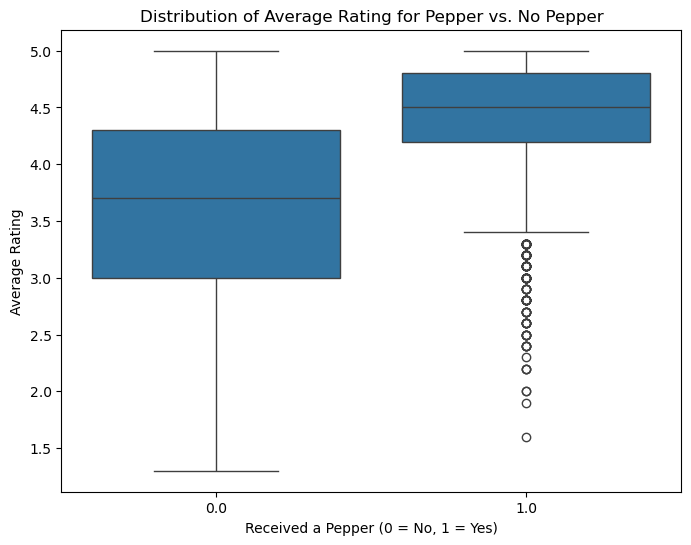

In [119]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Received a pepper', y='Average Rating', data=numDat)
plt.title('Distribution of Average Rating for Pepper vs. No Pepper')
plt.xlabel('Received a Pepper (0 = No, 1 = Yes)')
plt.ylabel('Average Rating')
plt.show()

Yes, Pepper (attractiveness of a professor) affects the variance of the distribution of average ratings.
Hence, Pepper is a confound.

In [121]:
from scipy.stats import levene

# Step 1: Split data into two groups: Pepper and No Pepper
pepper_data = numDat[numDat['Received a pepper'] == 1]
no_pepper_data = numDat[numDat['Received a pepper'] == 0]

# Step 2: Compare Variance for Male and Female Professors WITH a Pepper
print("Comparing Variance for Male and Female Professors WITH a Pepper")
if len(pepper_data) > 0:
    ratings_male_pepper = pepper_data[pepper_data['Male Professor'] == 1]['Average Rating']
    ratings_female_pepper = pepper_data[pepper_data['Female Professor'] == 1]['Average Rating']
    
    if len(ratings_male_pepper) > 1 and len(ratings_female_pepper) > 1:
        # Perform Levene's Test
        stat_var_pepper, p_var_pepper = levene(ratings_male_pepper, ratings_female_pepper)
        print(f"  Levene's Test - Variance P-value: {p_var_pepper:.4f}")
        
        if p_var_pepper < 0.005:
            print("  The variances are significantly different (reject the null hypothesis).")
        else:
            print("  The variances are not significantly different (fail to reject the null hypothesis).")
    else:
        print("  Not enough data for Male or Female Professors WITH a Pepper.")
else:
    print("No data for professors WITH a Pepper.")

print("-" * 50)

# Step 3: Compare Variance for Male and Female Professors WITHOUT a Pepper
print("Comparing Variance for Male and Female Professors WITHOUT a Pepper")
if len(no_pepper_data) > 0:
    ratings_male_no_pepper = no_pepper_data[no_pepper_data['Male Professor'] == 1]['Average Rating']
    ratings_female_no_pepper = no_pepper_data[no_pepper_data['Female Professor'] == 1]['Average Rating']
    
    if len(ratings_male_no_pepper) > 1 and len(ratings_female_no_pepper) > 1:
        # Perform Levene's Test
        stat_var_no_pepper, p_var_no_pepper = levene(ratings_male_no_pepper, ratings_female_no_pepper)
        print(f"  Levene's Test - Variance P-value: {p_var_no_pepper:.4f}")
        
        if p_var_no_pepper < 0.005:
            print("  The variances are significantly different (reject the null hypothesis).")
        else:
            print("  The variances are not significantly different (fail to reject the null hypothesis).")
    else:
        print("  Not enough data for Male or Female Professors WITHOUT a Pepper.")
else:
    print("No data for professors WITHOUT a Pepper.")


Comparing Variance for Male and Female Professors WITH a Pepper
  Levene's Test - Variance P-value: 0.0105
  The variances are not significantly different (fail to reject the null hypothesis).
--------------------------------------------------
Comparing Variance for Male and Female Professors WITHOUT a Pepper
  Levene's Test - Variance P-value: 0.1567
  The variances are not significantly different (fail to reject the null hypothesis).


When examining male and female professors separately, there is no significant difference in the variance of Average Rating within the pepper or no-pepper groups. However, when gender is not considered, the presence of a pepper significantly affects the variance. This indicates that the pepper is a confounding variable, leading to misleading conclusions about variance differences in average ratings.

Conclusion:
Proportion of student that said they would take the class again, Average Difficulty, and Pepper are all confounds.

When we control for pepper, the gender difference between variance in distributions of average ratings disappears.
Similarly, twhen the Proportion of Students who said they would retake the class is controlled for, the gender difference between variance in distributions of average ratings disappears.
$\newline$
This means that the variability in distribution of ratings among men and women is heavily due to these two factors, and not actual gender bias.
$\newline$
However, In the difficulty group 2.9-3.5, variances between male and female professors differ significantly. This suggests variability in ratings might depend on gender within this difficulty group.
For the other difficulty groups, both the variances and means of Average Rating between male and female professors are not significantly different, suggesting no evidence of gender-related variability in these groups.

When controlling for confounds, virtually all differences in variability of distributiion of ratings between male and female professors went away. This signifies to me that the original hypothesis that there is a significant difference was based on confounds, and that in realioty there is no gender bias, except for a very small portion of the population, namely those professors within the difficulty group 2.9-3.5